# Reading the csv and importing the required libraries

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv("SampleSuperstore.csv")

# Checking the summary of data

In [20]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Shape of data

In [21]:
df.shape

(9994, 13)

# Concise summary of dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Printing Columns in data

In [23]:
print(df.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


# Statistical info of data

In [24]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Checking the count of null values

In [25]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Checking duplicate data

In [26]:
df.duplicated().sum()

17

# Dropping duplicate data

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

# Dropping unnecesary columns

Columns like Country and Postal Code doesn't add much value here, so let's drop them

In [29]:
df.drop(columns=['Country' , 'Postal Code'], inplace=True , axis=1)

In [30]:
df.shape

(9977, 11)

# Checking Correlation and heatmap of dataset

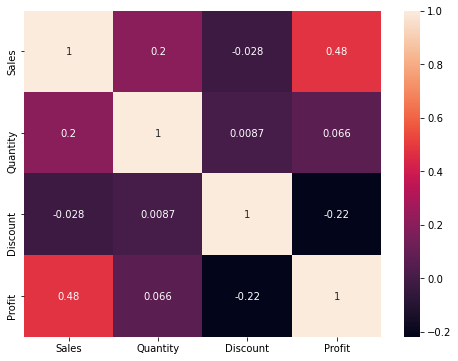

In [31]:
fig,axes = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

We can see that there is a correaltion between Profit and sales, We will plot a graph for this further

In [32]:
sns.set_style("whitegrid")

# Region wise plotting

<AxesSubplot:xlabel='Region', ylabel='count'>

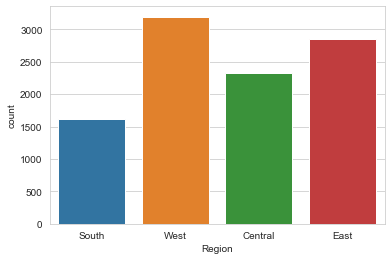

In [33]:
sns.countplot(x =df['Region'])

<AxesSubplot:xlabel='Region', ylabel='Profit'>

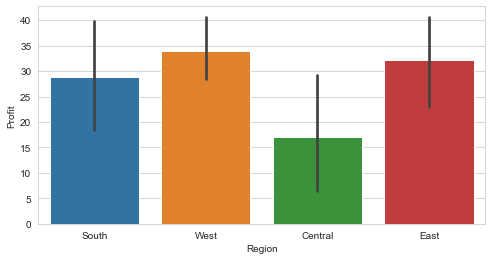

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Region'], y=df['Profit'])

Western region is giving maximum profit whereas Central is giving minimum

# Category wise plotting

<AxesSubplot:xlabel='Category', ylabel='count'>

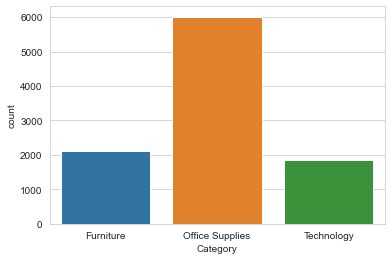

In [35]:
sns.countplot(x =df['Category'])

Let's see which category is providing maximum profit

<AxesSubplot:xlabel='Category', ylabel='Profit'>

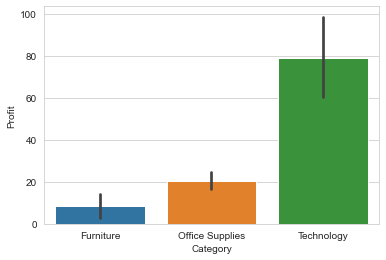

In [36]:
sns.barplot(x=df['Category'], y=df['Profit'])

Barplot shows that "Technology" is providing the max profit

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

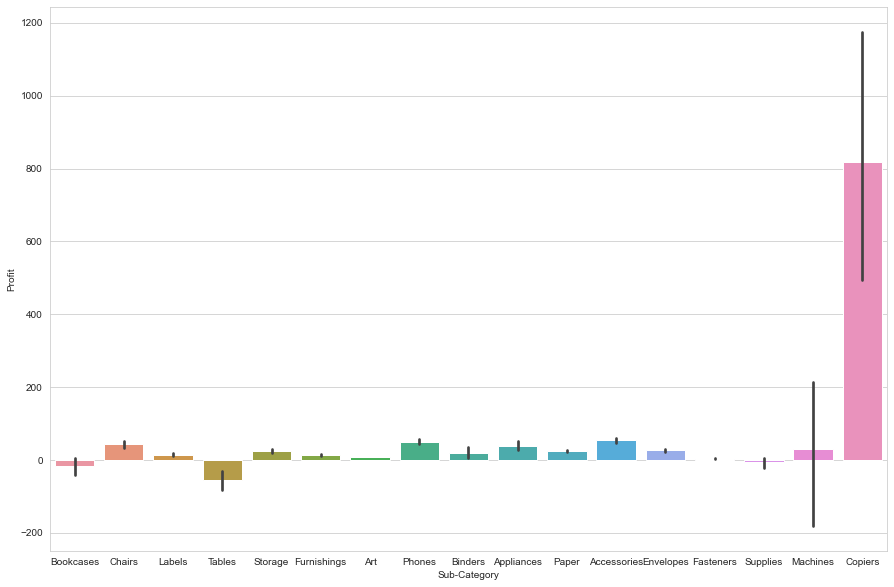

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])

We can also use value counts for the same purpose
# Segment wise plotting

<AxesSubplot:>

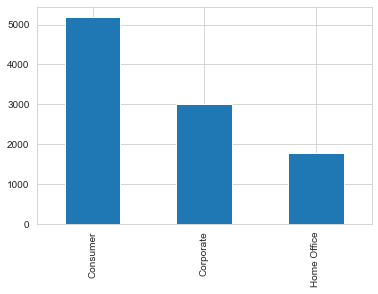

In [38]:
df['Segment'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

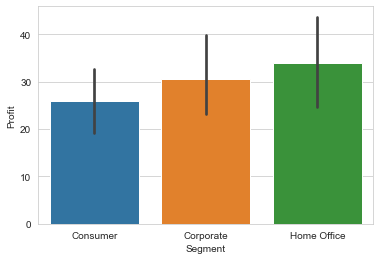

In [39]:
sns.barplot(x=df['Segment'], y=df['Profit'])

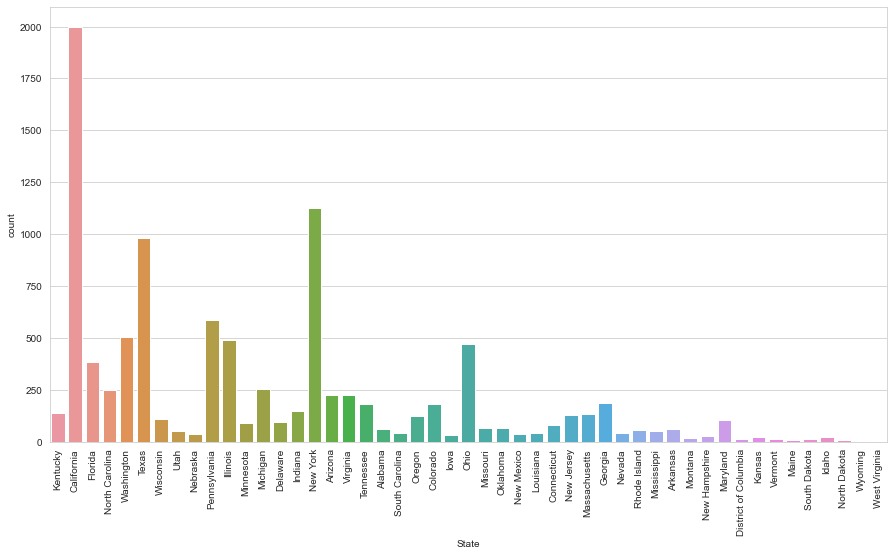

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(x ='State' ,data=df)
plt.xticks(rotation=90)
plt.show()

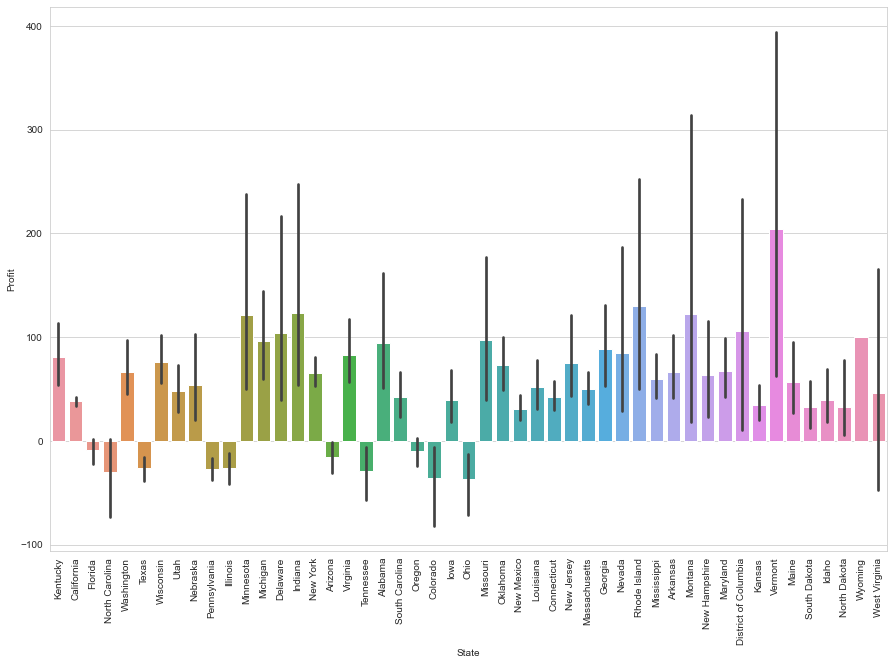

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['State'], y=df['Profit'])
plt.xticks(rotation=90)
plt.show()

In [42]:
df[df['Profit'] == df['Profit'].max()]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [43]:
df[df['Profit'] == df['Profit'].min()]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.978


# Profit v/s Sales

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

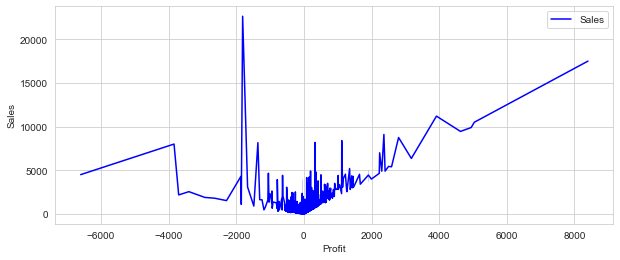

In [44]:
plt.figure(figsize = (10,4))
sns.lineplot(x ='Profit', y='Sales', data = df, color = 'b', label= 'Sales')

# Discount v/s Profit

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

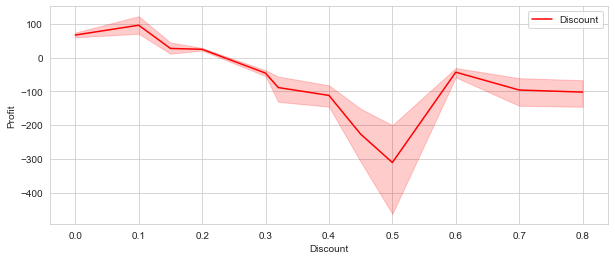

In [45]:
plt.figure(figsize = (10,4))
sns.lineplot(x ='Discount', y='Profit', data = df, color = 'r', label= 'Discount')

# Quantity v/s Profit

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

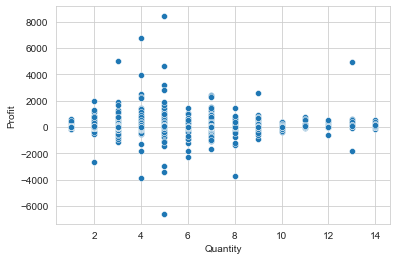

In [46]:
sns.scatterplot(x = df["Quantity"] , y= df["Profit"])

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

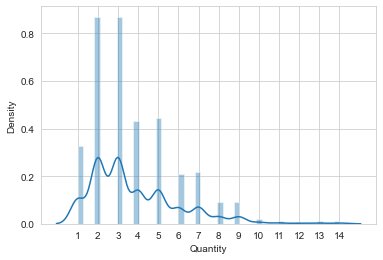

In [47]:
xdata = range(1,15)
sns.distplot(df['Quantity'])
plt.xticks(xdata)
plt.show

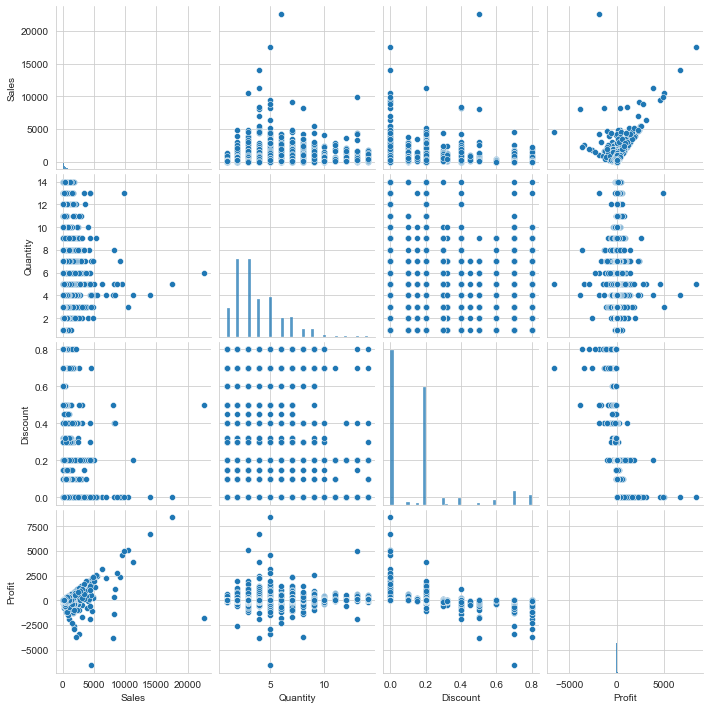

In [48]:
sns.pairplot(df)